In [1]:
import anndata as ad
ppmi_ad = ad.read_h5ad("/Users/kpax/Documents/aep/study/MSC/lab/PPMI_Project_133_RNASeq/ppmi_adata.h5ad")


In [2]:
mask = ((ppmi_ad.obs['Age_Group'] == '>80') &
        (ppmi_ad.obs['Gender'] == 'Male') &
        (ppmi_ad.obs['Diagnosis'].isin(['PD', 'Control'])) &
        (ppmi_ad.obs['Visit'] == 'BL'))

In [3]:
ppmi_ad = ppmi_ad[mask]

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import (
    VarianceThreshold,
    SelectKBest,
    f_classif,
    mutual_info_classif,
    chi2
)
from skfeature.function.similarity_based import fisher_score
from sklearn.preprocessing import KBinsDiscretizer, StandardScaler

In [5]:
X = pd.DataFrame(ppmi_ad.layers['counts_log2'], columns=ppmi_ad.var_names)
y = (ppmi_ad.obs['Diagnosis'] == 'PD').astype(int)

In [6]:
var_selector = VarianceThreshold(threshold=0.1)
X_highvar = var_selector.fit_transform(X)
selected_genes = X.columns[var_selector.get_support()]
print(f"After variance threshold: {len(selected_genes)} genes remaining")

After variance threshold: 54886 genes remaining


In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_highvar)

In [8]:
n_top_genes = 20000

### Anova F-Value

In [9]:
anova_scores, _ = f_classif(X_scaled, y)
top_indices_anovaf = np.argsort(anova_scores)[-n_top_genes:][::-1]
anova_selected_genes = selected_genes[top_indices_anovaf]
anova_selected_genes

/Users/kpax/Documents/aep/study/MSC/lab/ppmi-wip/ppmi-env/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [  373   800  3914  3938  7042  7723  8545  8888  9786 11209 13203 14475
 18632 20900 21868 23419 23866 24126 27883 29684 32710 33698 34298 35496
 35544 36675 37094 37210 37231 37804 38379 44312 45022 45165 46819 48610
 48728 49438 49640 50594 51992 52598 53173] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/kpax/Documents/aep/study/MSC/lab/ppmi-wip/ppmi-env/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


Index(['ENSG00000258827.2', 'ENSG00000238804.1', 'ENSG00000250307.2',
       'ENSG00000201763.1', 'ENSG00000268931.1', 'ENSG00000222982.1',
       'ENSG00000268711.1', 'ENSG00000274892.1', 'ENSG00000270491.1',
       'ENSG00000212717.3',
       ...
       'ENSG00000257008.6', 'ENSG00000206075.13', 'ENSG00000251639.2',
       'ENSG00000269826.1', 'ENSG00000262362.1', 'ENSG00000250247.1',
       'ENSG00000111300.9', 'ENSG00000214889.3', 'ENSG00000239572.2',
       'ENSG00000100206.9'],
      dtype='object', length=20000)

### Chi-Squared

In [10]:
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
X_processed = discretizer.fit_transform(X_scaled)
chi2_scores, _ = chi2(X_processed, y)
top_indices_chi2 = np.argsort(chi2_scores)[-n_top_genes:][::-1]
chi2_selected_genes = selected_genes[top_indices_chi2]
chi2_selected_genes

Index(['ENSG00000199489.1', 'ENSG00000200379.1', 'ENSG00000207283.1',
       'ENSG00000200806.1', 'ENSG00000268711.1', 'ENSG00000237322.1',
       'ENSG00000256045.2', 'ENSG00000236878.1', 'ENSG00000222640.1',
       'ENSG00000250307.2',
       ...
       'ENSG00000227538.1', 'ENSG00000183378.11', 'ENSG00000101333.16',
       'ENSG00000227128.4', 'ENSG00000150471.16', 'ENSG00000153789.12',
       'ENSG00000181001.2', 'ENSG00000180389.7', 'ENSG00000139515.5',
       'ENSG00000263089.1'],
      dtype='object', length=20000)

### Mutual Information

In [11]:
mutual_info_scores = mutual_info_classif(X_scaled, y)
top_indices_mutual_info = np.argsort(mutual_info_scores)[-n_top_genes:][::-1]
mutual_info_selected_genes = selected_genes[top_indices_mutual_info]
mutual_info_selected_genes

Index(['ENSG00000259160.1', 'ENSG00000241383.1', 'ENSG00000256045.2',
       'ENSG00000238804.1', 'ENSG00000268711.1', 'ENSG00000234688.1',
       'ENSG00000253693.1', 'ENSG00000229037.2', 'ENSG00000271177.1',
       'ENSG00000274798.1',
       ...
       'ENSG00000285543.1', 'ENSG00000253088.1', 'ENSG00000284748.1',
       'ENSG00000157388.16', 'ENSG00000168158.3', 'ENSG00000257219.5',
       'ENSG00000284735.1', 'ENSG00000162512.15', 'ENSG00000117245.12',
       'ENSG00000261645.6'],
      dtype='object', length=20000)

### Fisher's Score

In [12]:
from skfeature.function.similarity_based import fisher_score
fisher_score = fisher_score.fisher_score(X_scaled, np.asarray(y))
top_indices_fisher = np.argsort(fisher_score)[-n_top_genes:][::-1]
fisher_selected_genes = selected_genes[top_indices_fisher]
fisher_selected_genes

/Users/kpax/Documents/aep/study/MSC/lab/ppmi-wip/ppmi-env/lib/python3.12/site-packages/skfeature/function/similarity_based/fisher_score.py:59: RuntimeWarning: divide by zero encountered in divide
  score = 1.0 / lap_score - 1


Index(['ENSG00000243107.1', 'ENSG00000172137.18', 'ENSG00000252255.1',
       'ENSG00000231879.1', 'ENSG00000270017.1', 'ENSG00000177688.6',
       'ENSG00000248568.1', 'ENSG00000269473.1', 'ENSG00000212497.1',
       'ENSG00000252614.1',
       ...
       'ENSG00000130385.5', 'ENSG00000243543.8', 'ENSG00000258446.1',
       'ENSG00000157881.13', 'ENSG00000223529.1', 'ENSG00000128284.19',
       'ENSG00000285237.1', 'ENSG00000248863.2', 'ENSG00000261332.1',
       'ENSG00000170476.15'],
      dtype='object', length=20000)

### Overlapping Genes

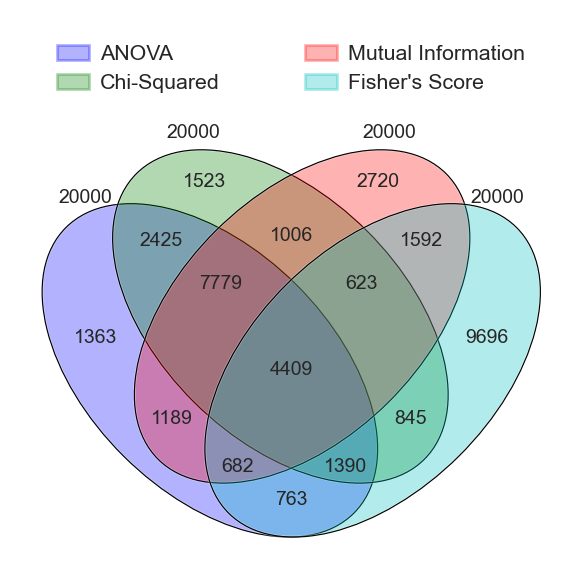

In [13]:
from venny4py.venny4py import *

sets = {
    'ANOVA': set(anova_selected_genes),
    'Chi-Squared': set(chi2_selected_genes),
    'Mutual Information': set(mutual_info_selected_genes),
    'Fisher\'s Score': set(fisher_selected_genes)
}
venny4py(sets=sets)


In [14]:
common_genes = set(anova_selected_genes) & set(chi2_selected_genes) & set(mutual_info_selected_genes) & set(fisher_selected_genes)
print(f"Number of common genes across methods: {len(common_genes)}")
print("Common genes:")
print(common_genes)

Number of common genes across methods: 4409
Common genes:
{'ENSG00000162631.18', 'ENSG00000134940.13', 'ENSG00000238950.1', 'ENSG00000172148.3', 'ENSG00000255082.1', 'ENSG00000235387.3', 'ENSG00000099365.10', 'ENSG00000248669.1', 'ENSG00000236009.1', 'ENSG00000234788.1', 'ENSG00000234717.1', 'ENSG00000199480.1', 'ENSG00000165462.5', 'ENSG00000264603.1', 'ENSG00000242221.8', 'ENSG00000215572.2', 'ENSG00000237111.1', 'ENSG00000159723.4', 'ENSG00000200737.1', 'ENSG00000241129.3', 'ENSG00000214324.5', 'ENSG00000207097.1', 'ENSG00000172602.10', 'ENSG00000276064.1', 'ENSG00000213215.5', 'ENSG00000185888.5', 'ENSG00000260645.2', 'ENSG00000119688.20', 'ENSG00000271560.1', 'ENSG00000182459.4', 'ENSG00000072315.3', 'ENSG00000236768.1', 'ENSG00000249222.1', 'ENSG00000196553.15', 'ENSG00000226181.1', 'ENSG00000277766.1', 'ENSG00000249349.1', 'ENSG00000092377.13', 'ENSG00000252107.1', 'ENSG00000122592.7', 'ENSG00000270938.1', 'ENSG00000228711.1', 'ENSG00000188517.15', 'ENSG00000221091.1', 'ENSG0000

In [15]:
method_collection = {
    'ANOVA': {
        'score': anova_scores,
        'genes': anova_selected_genes
    },
    'Chi-Squared': {
        'score': chi2_scores,
        'genes': chi2_selected_genes
    },
    'Mutual Information': {
        'score': mutual_info_scores,
        'genes': mutual_info_selected_genes
    },
    'Fisher\'s Score': {
        'score': fisher_score,
        'genes': fisher_selected_genes
    }
}

In [16]:
all_selected_genes = set()
for method in method_collection.values():
    all_selected_genes.update(method["genes"])

In [17]:
comparison = pd.DataFrame(index=list(all_selected_genes))

In [18]:
for method_name, results in method_collection.items():
    comparison[method_name] = 0
    comparison.loc[results['genes'], method_name] = 1
comparison['Times_Selected'] = comparison.sum(axis=1)

In [19]:
n_methods = len(method_collection)
consensus_genes = comparison[comparison['Times_Selected'] == n_methods]
print(f"Genes selected by ALL methods: {len(consensus_genes)}")

Genes selected by ALL methods: 4409


In [20]:
consensus_genes

,ANOVA,Chi-Squared,Mutual Information,Fisher's Score,Times_Selected
ENSG00000203923.4,1,1,1,1,4
ENSG00000140479.16,1,1,1,1,4
ENSG00000224825.2,1,1,1,1,4
ENSG00000201365.1,1,1,1,1,4
ENSG00000226277.1,1,1,1,1,4
...,...,...,...,...,...
ENSG00000221255.1,1,1,1,1,4
ENSG00000227533.5,1,1,1,1,4
ENSG00000235094.2,1,1,1,1,4
ENSG00000224586.6,1,1,1,1,4


In [20]:
symbol_ensembl_mapping = ppmi_ad.varm['symbol_ensembl_mapping'].loc[consensus_genes.index,:]['gene_symbol']

In [21]:
importance_df = pd.DataFrame(index=consensus_genes.index)

### Importance Scores

In [22]:
import math

def plot_feature_importances(method_collection, consensus_genes, symbol_ensembl_mapping):
    plt.figure(figsize=(15, 16))
    idx = 1
    for method_name, results in method_collection.items():
        df = pd.DataFrame({
            'Gene': selected_genes,
            'Score': results['score']
        })
        df_consensus = df[df['Gene'].isin(consensus_genes.index)]
        df_consensus = df_consensus.merge(
            symbol_ensembl_mapping.rename('gene_symbol'),
            left_on='Gene',
            right_index=True,
            how='left'
        )
        df_consensus = df_consensus.sort_values('Score', ascending=False)
        sns.set_style("whitegrid")
        subplot_row_count = math.ceil(len(method_collection) / 2)
        plt.subplot(subplot_row_count, 2, idx)
        plt.title(f' (Males 50-70) {method_name}', fontsize=14)
        ax = sns.barplot(
                data=df_consensus,
                x='Score',
                y='gene_symbol',
                palette="Blues_d",
                orient='h',
                dodge=False
            )
        idx += 1
        for i, score in enumerate(df_consensus['Score']):
            score_fmt = f'{score: .4f}' if method_name == 'Mutual Information' else f'{score: .1f}'
            ax.text(score, i, score_fmt, va='center', fontsize=6)
        plt.xticks(fontsize=6)
        plt.yticks(fontsize=6)
    plt.tight_layout
    plt.show()

/var/folders/qb/t7qv2b9n33n2xzbjvg_dk_4c0000gn/T/ipykernel_42574/4059608714.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
/var/folders/qb/t7qv2b9n33n2xzbjvg_dk_4c0000gn/T/ipykernel_42574/4059608714.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
/var/folders/qb/t7qv2b9n33n2xzbjvg_dk_4c0000gn/T/ipykernel_42574/4059608714.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
/var/folders/qb/t7qv2b9n33n2xzbjvg_dk_4c0000gn/T/ipykernel_42574/4059608714.py:23: FutureWarning: 

Passing `palette` without assigning `hue` 

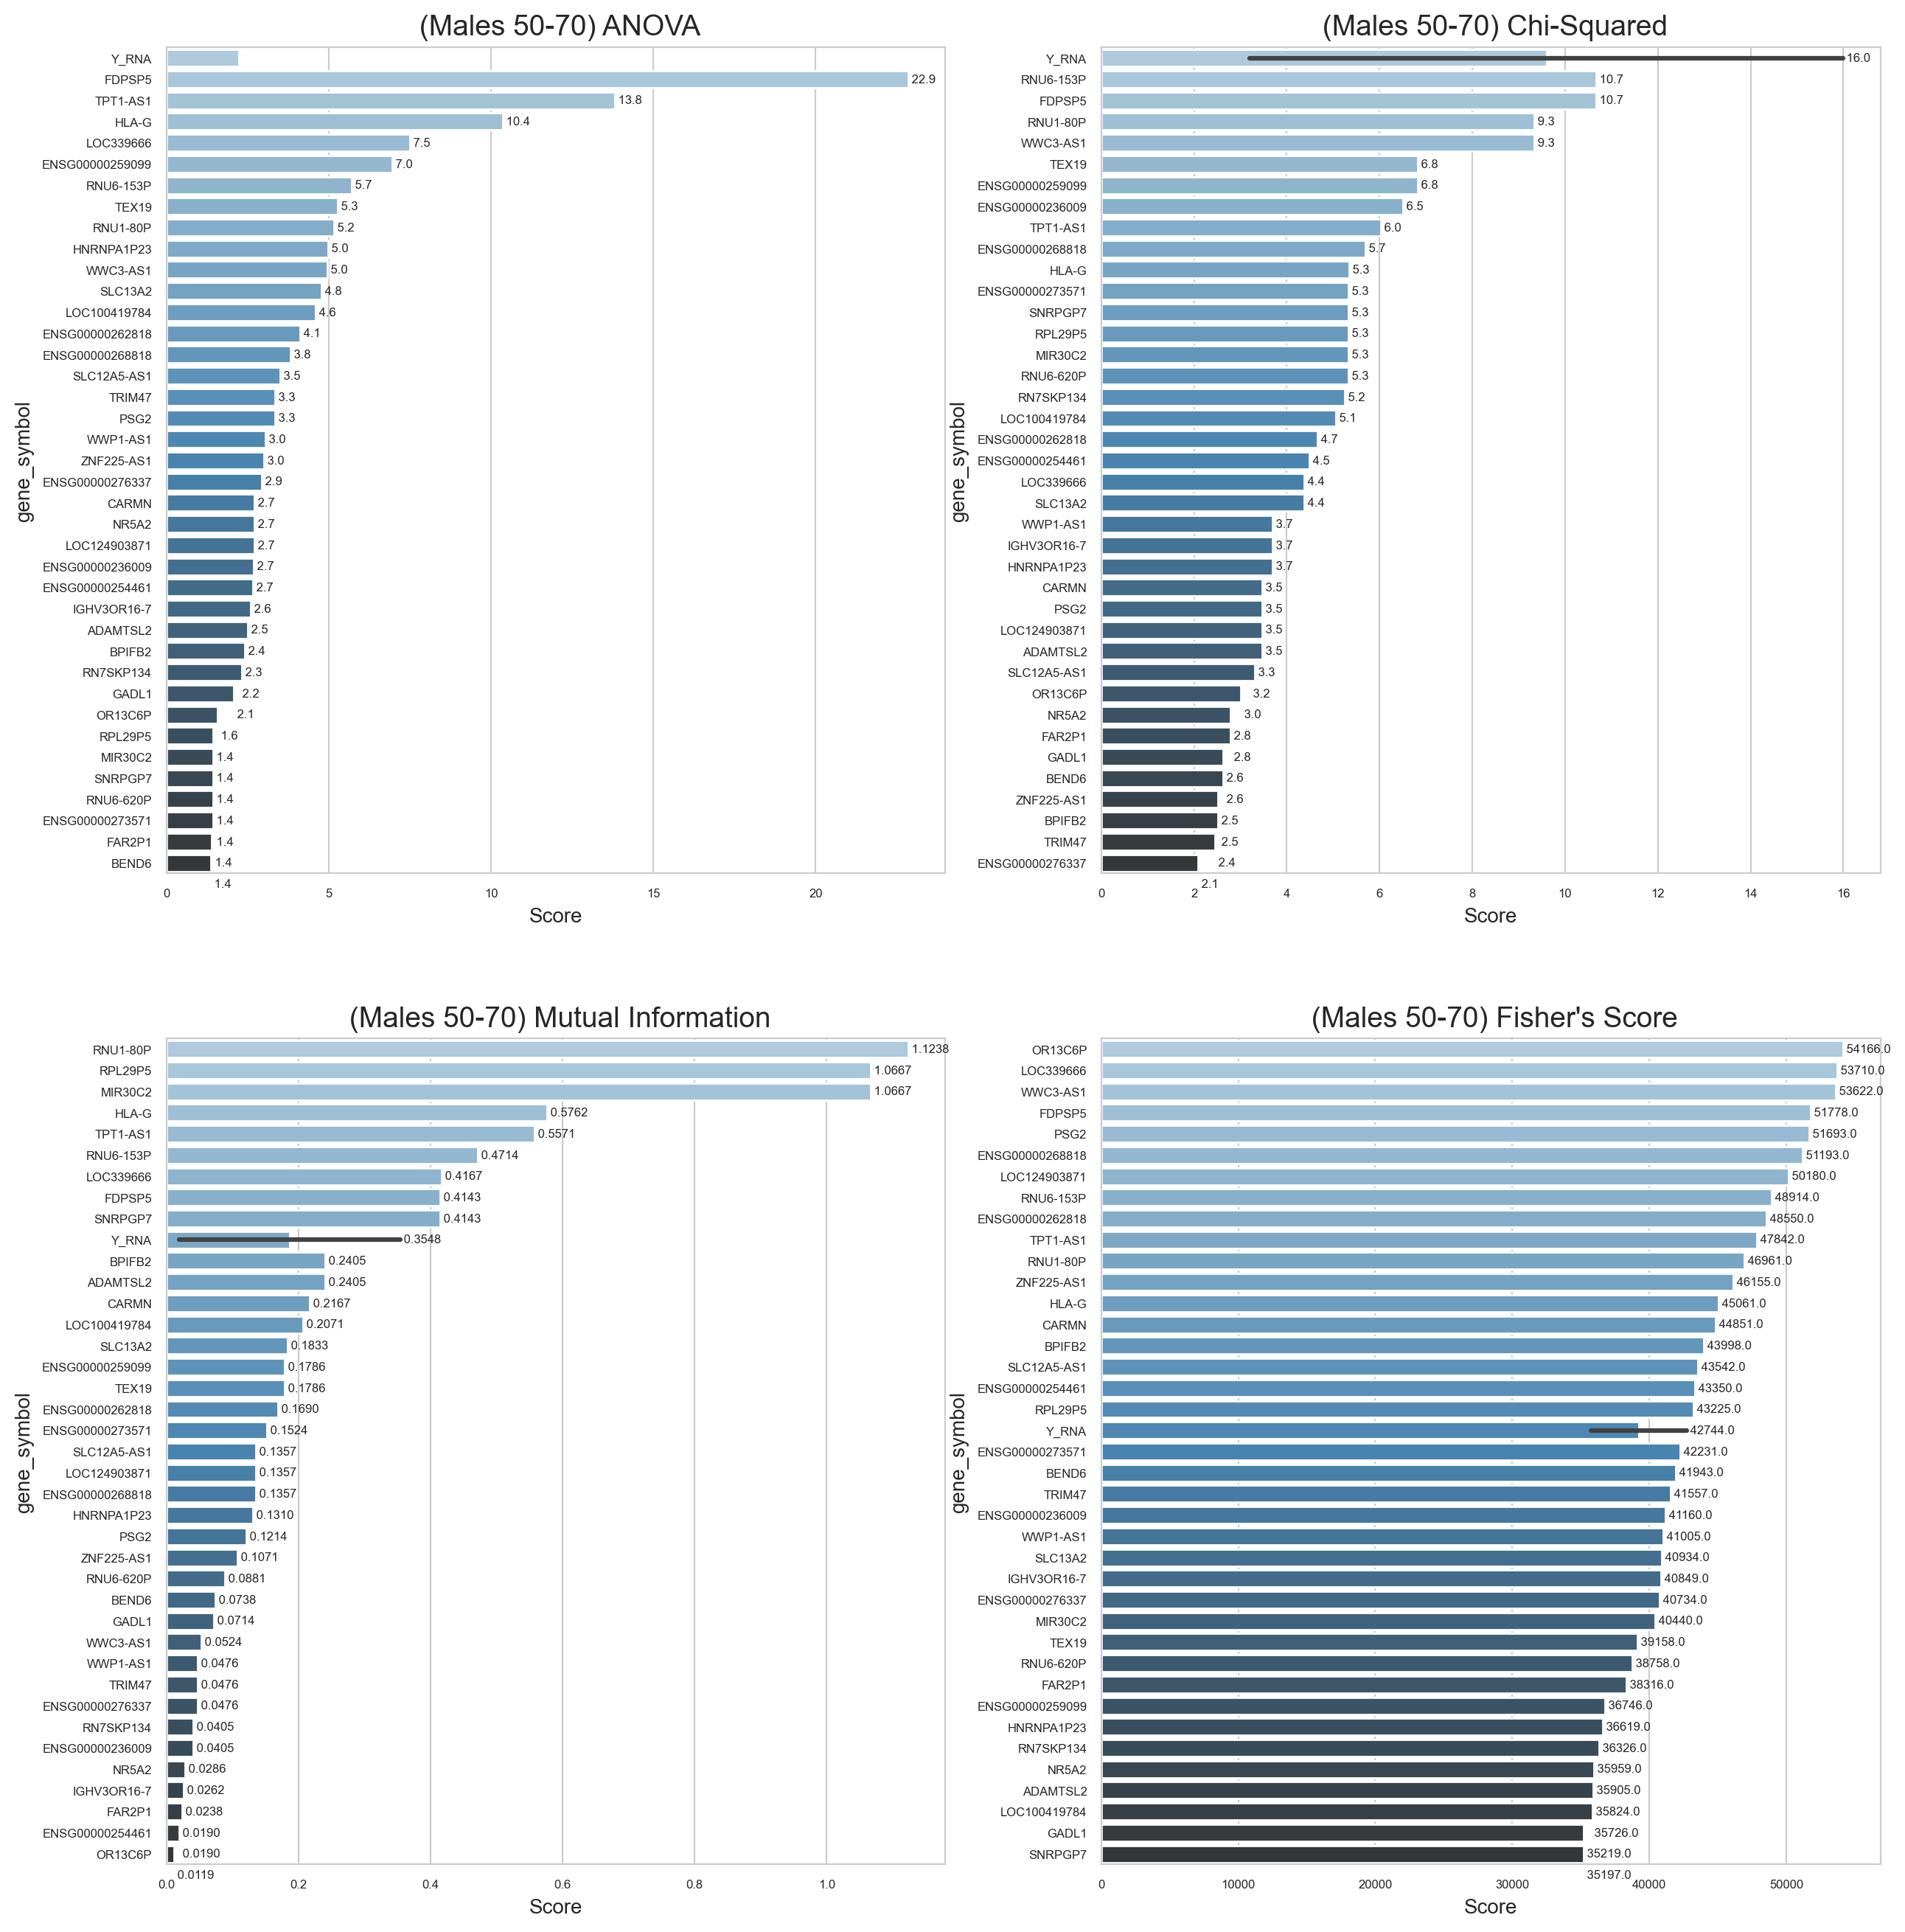

In [23]:
import seaborn as sns
plot_feature_importances(method_collection, consensus_genes.head(40), symbol_ensembl_mapping)

In [24]:
consensus_gene_symbols = symbol_ensembl_mapping[consensus_genes.index].to_frame()

### Enrichment of Consensus Genes

In [25]:
import gseapy as gp

In [26]:
enr = gp.enrichr(gene_list=consensus_gene_symbols['gene_symbol'].to_list(),
                 gene_sets=['MSigDB_Hallmark_2020',
                            'KEGG_2021_Human',
                            'WikiPathways_2024_Human',
                            'Human_Phenotype_Ontology',
                            'GO_Biological_Process_2025',
                            'GO_Molecular_Function_2025',
                            'GO_Cellular_Component_2025',
                            'SynGO_2024',
                            'OMIM_Disease'],
                 organism='human')

In [27]:
enr.results

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,MSigDB_Hallmark_2020,Apical Surface,8/44,0.765340,0.999996,0,0,0.804559,2.151673e-01,NTNG1;SCUBE1;ATP8B1;PCSK9;ATP6V0A4;THY1;SLC2A4...
1,MSigDB_Hallmark_2020,Angiogenesis,5/36,0.915101,0.999996,0,0,0.583735,5.178924e-02,VTN;KCNJ8;APOH;PRG2;PDGFA
2,MSigDB_Hallmark_2020,Hedgehog Signaling,4/36,0.967827,0.999996,0,0,0.452261,1.478997e-02,TLE1;THY1;L1CAM;SCG2
3,MSigDB_Hallmark_2020,Notch Signaling,2/32,0.995994,0.999996,0,0,0.241125,9.679519e-04,HEYL;KAT2A
4,MSigDB_Hallmark_2020,Pancreas Beta Cells,2/40,0.999302,0.999996,0,0,0.190265,1.328156e-04,PCSK2;SYT13
...,...,...,...,...,...,...,...,...,...,...
5804,OMIM_Disease,deafness,2/111,0.999996,0.999996,0,0,0.066030,2.771085e-07,MYO15A;PAX3
5805,OMIM_Disease,diabetes mellitus,1/58,0.999996,0.999996,0,0,0.063330,2.570044e-07,SLC2A4
5806,OMIM_Disease,diabetes,2/75,0.999996,0.999996,0,0,0.098820,3.869360e-07,SLC2A4;AQP2
5807,OMIM_Disease,anemia,1/61,0.999996,0.999996,0,0,0.060152,2.257564e-07,TMPRSS6


In [28]:
enr_res_pivot = enr.results.pivot(index='Term', columns='Genes', values='P-value')
enr_res_pivot = enr_res_pivot.fillna(1.0)

Text(0.5, 1.0, 'GSEA Results of Consensus Genes for Males Aged 50-70')

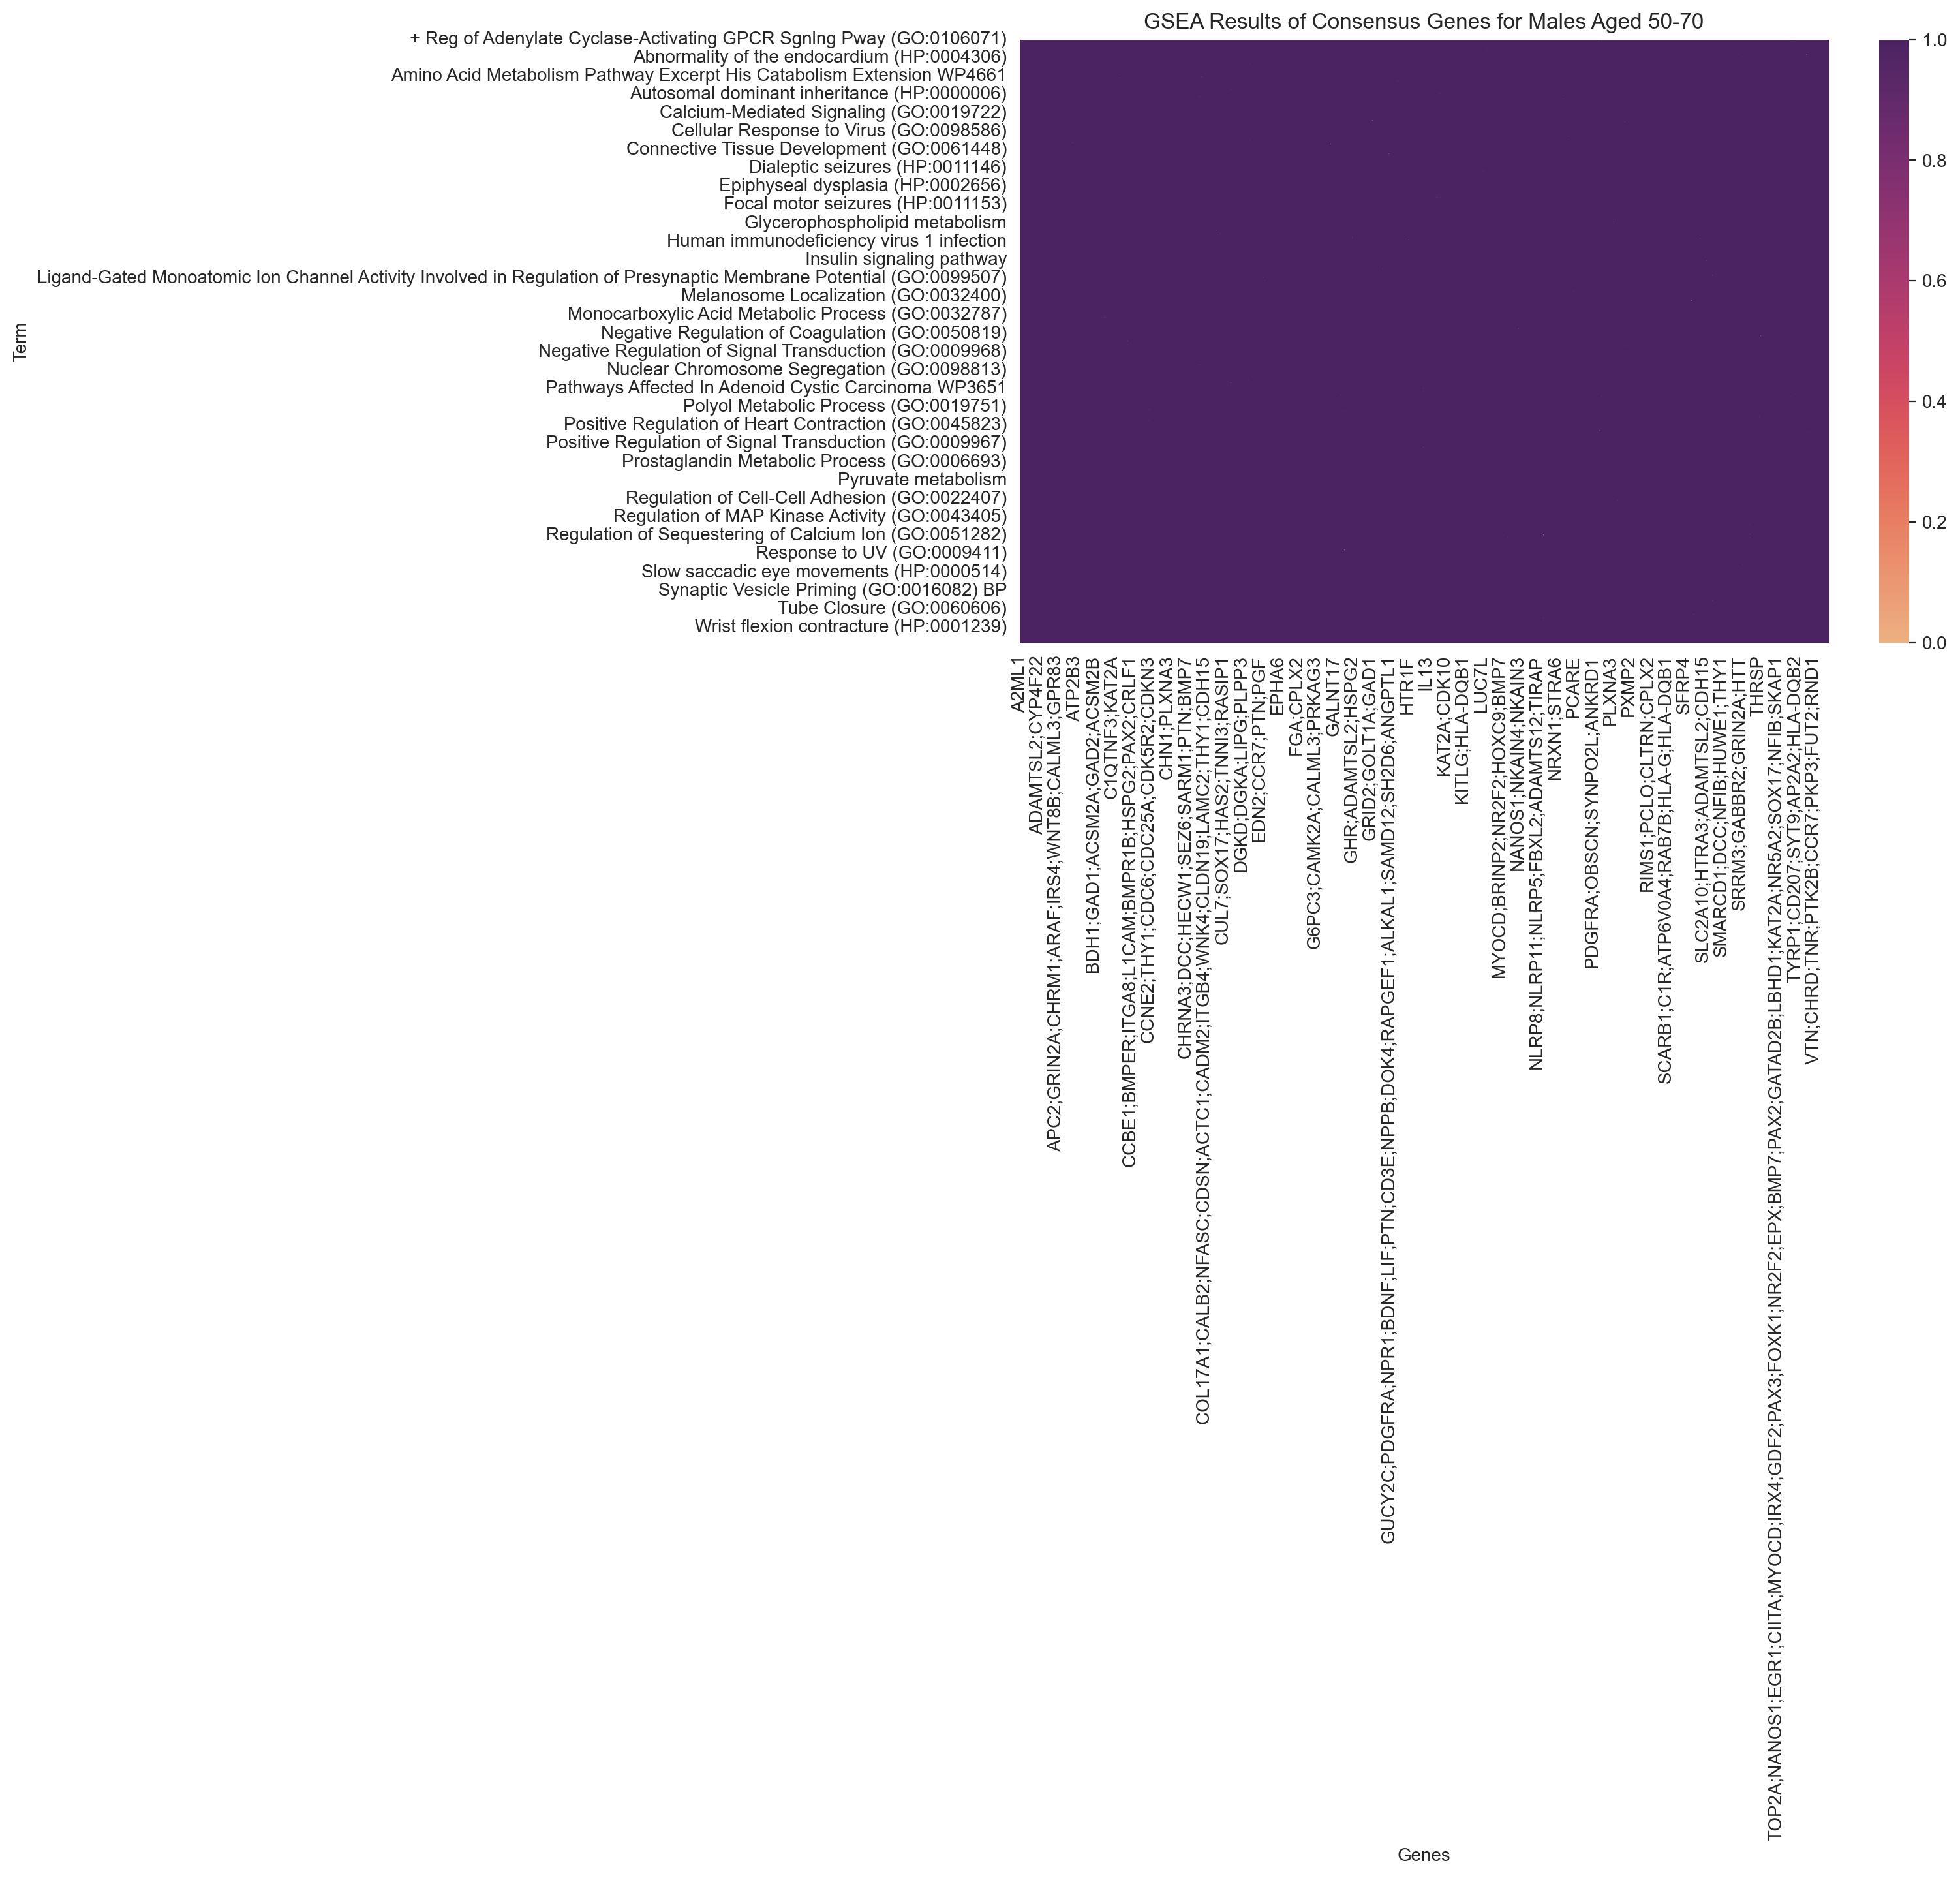

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(
    enr_res_pivot,
    cmap='flare',
    fmt='.3f',
    vmin=0, vmax=1
)
plt.title("GSEA Results of Consensus Genes for Males Aged 50-70")

In [30]:
symbol_ensembl_mapping.to_csv("/Users/kpax/Documents/aep/study/MSC/lab/PPMI_Project_133_RNASeq/feature_selection_consensus_males_over_80.csv")